In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
# style = 'dark_background'
style = 'fivethirtyeight'
# style = 'default'
plt.style.use('default')
plt.style.use(style)

if style.count('dark') > 0:
    line_color = '.-w'
else:
    line_color = '.-k'


In [3]:
betas = [10**i for i in range(-4,0)]

In [11]:
def plot_results(energy = False, ds = 'train', latent_dim = 20):
    ## MSE - Train
    mse_betas = np.zeros_like(betas)
    numlat_betas = np.zeros_like(betas)
    dkl_betas = np.zeros((len(betas), latent_dim))
    for i,b in enumerate(betas):
        with open(f'Results/results_VAE_4RollOSC_Latent_{latent_dim}_energy_{energy}_beta_{b:g}_{ds}.txt', 'rt') as f:
            lines = f.readlines()

        param_line = lines[0::4]
        error_line = lines[1::4]
        dkl_line = lines[2::4]

        mse_error = np.array([float(x.split()[-1]) for x in error_line])
        dkl = np.array([eval(x.replace('KL Divergence: ', '')) for x in dkl_line], dtype=float)

        mse_betas[i] = mse_error.mean()
        numlat_betas[i] = np.sum(dkl.mean(0)>1e-2)
        dkl_betas[i] = dkl.mean(0)


    f, ax = plt.subplots(1,3, figsize=(20,5))

    ## Energy Error
    ax[0].plot(betas, mse_betas,line_color)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    ax[0].set_ylabel('Rel. Energy Error')

    ## Number of Modes
    ax[1].plot(betas, numlat_betas,line_color)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('$\\mathbb{D}_{KL}$ Weight')
    ax[1].set_ylabel('# of Relevant latent variables')
    ax[1].set_yticks(np.unique(numlat_betas))

    ## KL Div.
    for b, dkl in zip(betas, dkl_betas):
        idx = np.argsort(dkl)
        idx = np.flip(idx)
        ax[2].plot(np.arange(0,latent_dim),dkl[idx],'o-', label = '$\\beta_{KL}$ = '+f'{b:g}')
    ax[2].set_yscale('log')
    ax[2].set_ylabel('$\\mathbb{D}_{KL}$')
    ax[2].set_xlabel('Latent Variable Index')
    ax[2].set_xticks([x for x in np.arange(0,latent_dim,4)] + [latent_dim-1])

    ax[2].axhline(y=1e-2, color='r', linestyle='--', alpha = 0.5)

    plt.legend(loc='center left',bbox_to_anchor=(1., .8))
    f.suptitle(f'{ds.capitalize()} Dataset')

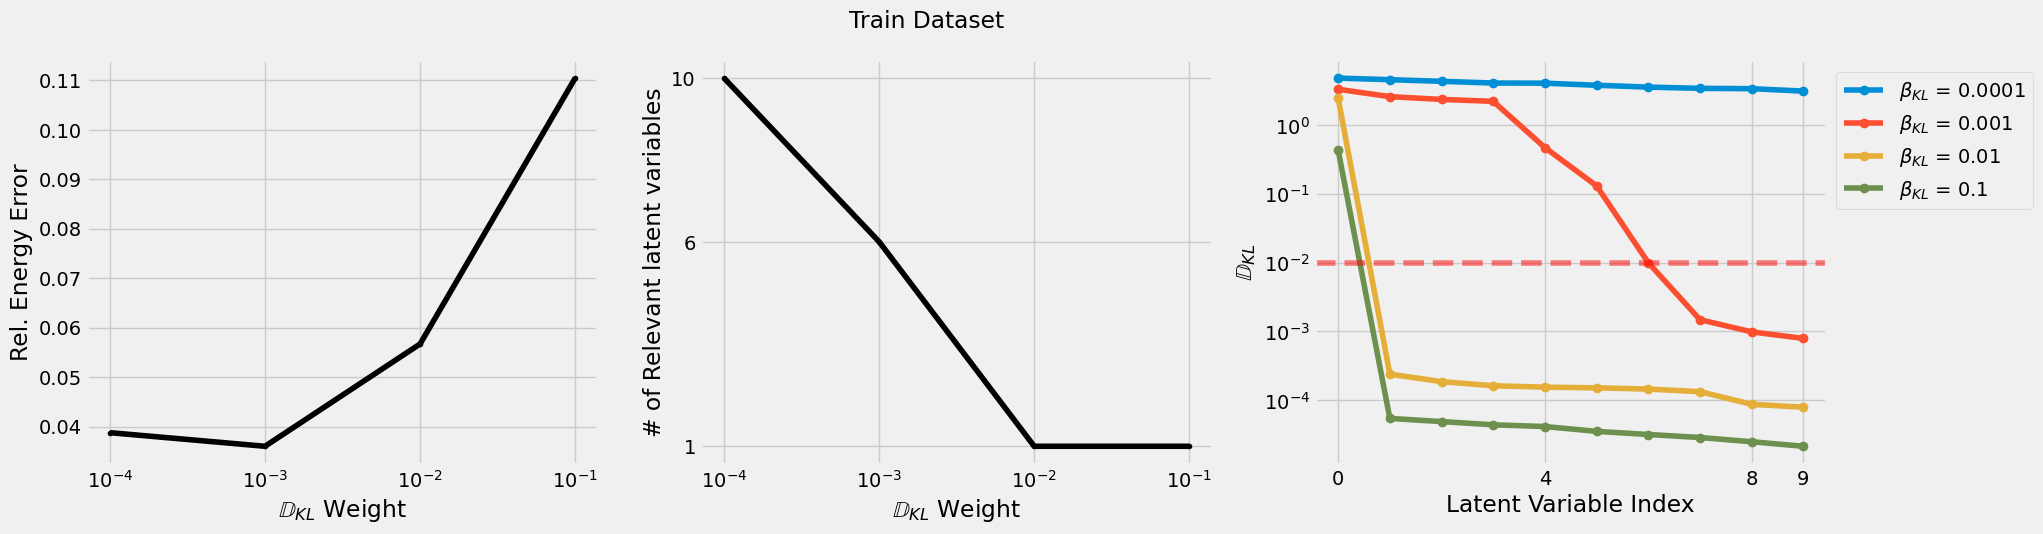

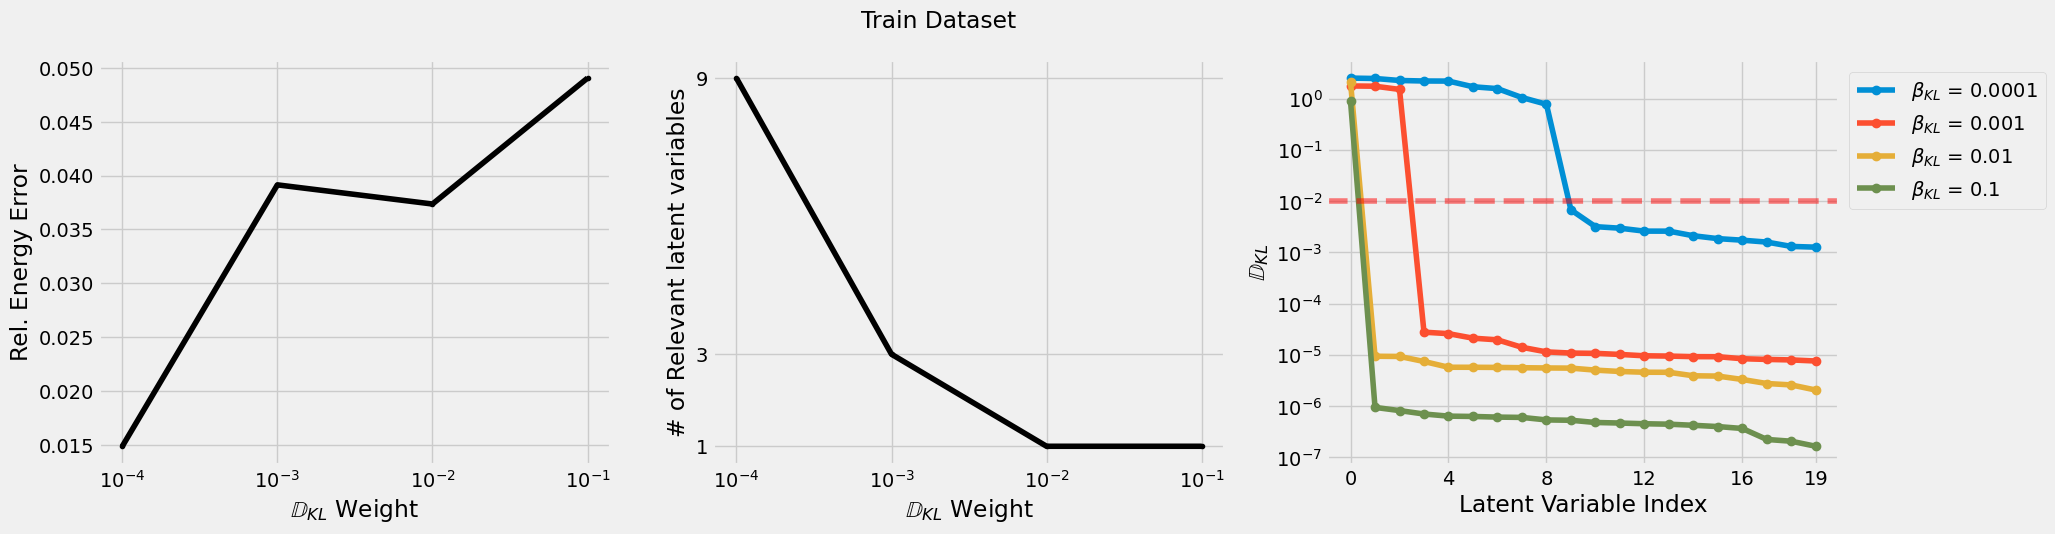

In [13]:
plot_results(energy = 'BOTH', ds = 'train', latent_dim=10) # MSE
plot_results(energy = False, ds = 'train') # MSE

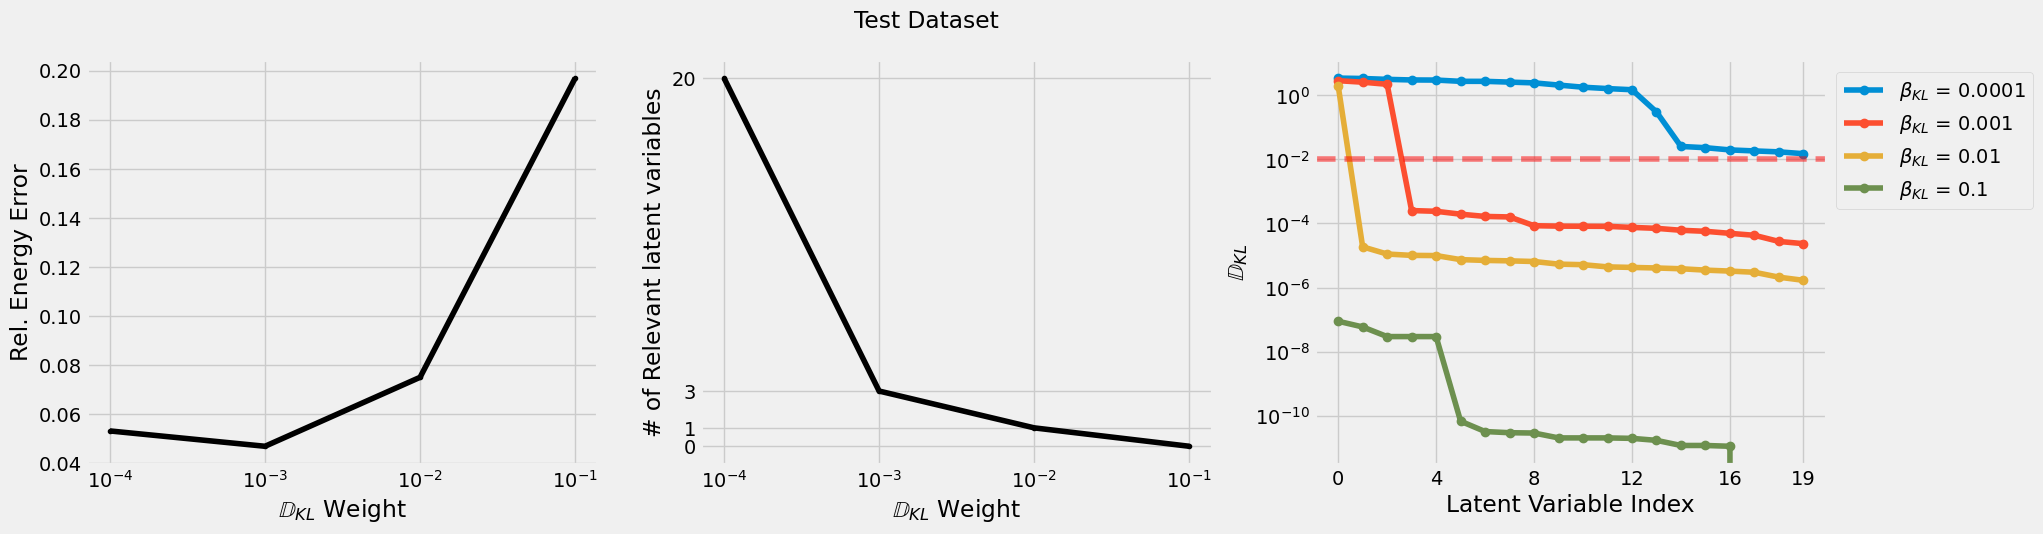

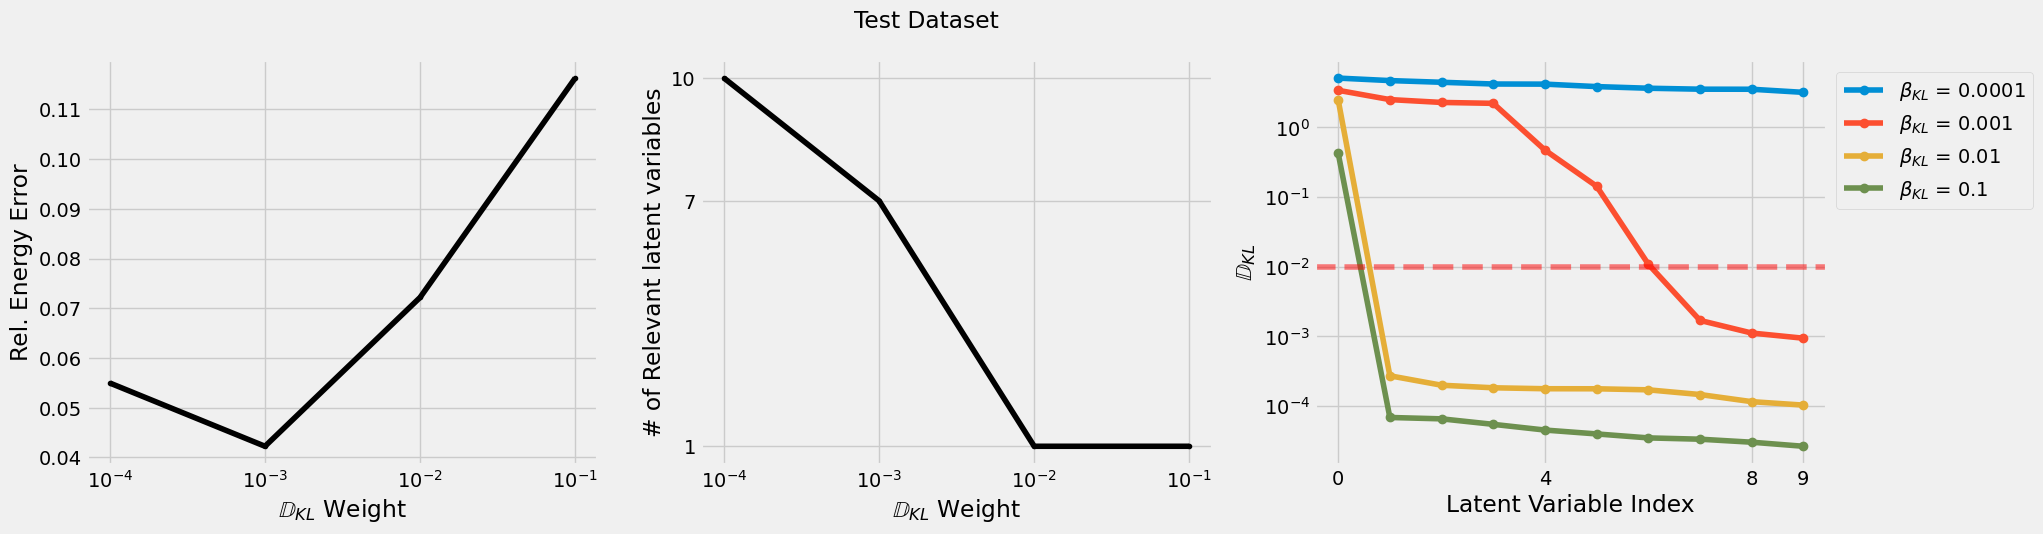

In [15]:
plot_results(energy = True, ds = 'test') # Energy
plot_results(energy = 'BOTH', ds = 'test', latent_dim=10) # Energy

MSE Error Mean: 0.03948475895833334
Energy Error Mean: 0.12883026625000002
0.14583333333333334


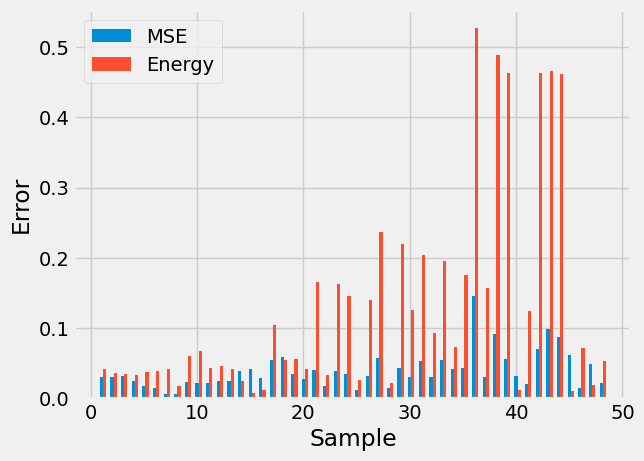

In [47]:
with open('Results/results_osc_train_new.txt', 'rt') as f:
    lines = f.readlines()

p = lines[0::4]
mse_e = lines[1::4]
eng_e = lines[2::4]

thetas = np.zeros(len(p))
mse_error = np.zeros(len(p))
eng_error = np.zeros(len(p))
for i, (pp, m, e) in enumerate(zip(p, mse_e, eng_e)):
    thetas[i] = float(pp.split(' ')[-1])
    mse_error[i] = float(m.split(' ')[-1])
    eng_error[i] = float(e.split(' ')[-1])

idx = np.argsort(thetas)
thetas = thetas[idx]
mse_error = mse_error[idx]
eng_error = eng_error[idx]

print(f'MSE Error Mean: {mse_error.mean()}\nEnergy Error Mean: {eng_error.mean()}')

plt.bar(1+np.arange(len(mse_error)), mse_error,0.3, label='MSE')
plt.bar(1+np.arange(len(mse_error))+0.3, eng_error,0.3, label='Energy')
# plt.bar(thetas, mse_error,0.001, label='MSE')
# plt.bar(thetas, eng_error,0.001, label='Energy')

plt.xlabel(f'Sample')
plt.ylabel('Error')
melhor = np.argwhere((mse_error - eng_error) > 0)
print(len(melhor) / len(mse_error))
plt.legend()

In [5]:
't129.2.pt'.replace('t','').replace('.p','')

'129.2'

MSE Error Mean: 0.03877942125
Energy Error Mean: 0.046388585833333336
0.5625


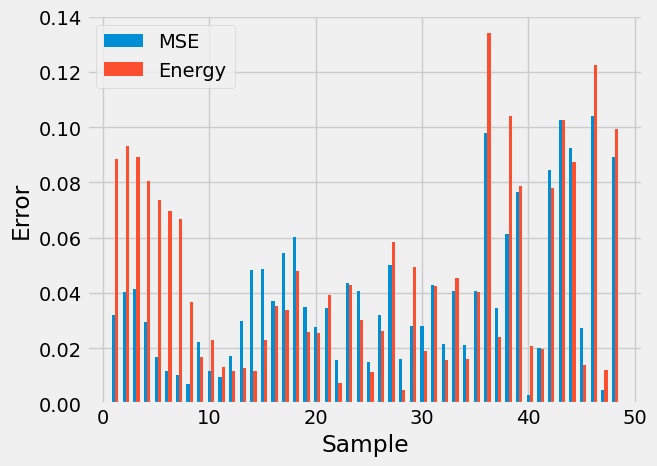

In [ ]:
with open('Results/results_osc_train.txt', 'rt') as f:
    lines = f.readlines()

p = lines[0::4]
mse_e = lines[1::4]
eng_e = lines[2::4]

thetas = np.zeros(len(p))
mse_error = np.zeros(len(p))
eng_error = np.zeros(len(p))
for i, (pp, m, e) in enumerate(zip(p, mse_e, eng_e)):
    thetas[i] = float(pp.split(' ')[-1])
    mse_error[i] = float(m.split(' ')[-1])
    eng_error[i] = float(e.split(' ')[-1])

idx = np.argsort(thetas)
thetas = thetas[idx]
mse_error = mse_error[idx]
eng_error = eng_error[idx]

print(f'MSE Error Mean: {mse_error.mean()}\nEnergy Error Mean: {eng_error.mean()}')

plt.bar(1+np.arange(len(mse_error)), mse_error,0.3, label='MSE')
plt.bar(1+np.arange(len(mse_error))+0.3, eng_error,0.3, label='Energy')
# plt.bar(thetas, mse_error,0.001, label='MSE')
# plt.bar(thetas, eng_error,0.001, label='Energy')

plt.xlabel(f'Sample')
plt.ylabel('Error')
melhor = np.argwhere((mse_error - eng_error) > 0)
print(len(melhor) / len(mse_error))
plt.legend()